### Minimization Method for Multiple Dimensions, computed for the Gradient Descent Algorithm
#### For the parabolic search method for 1D, see other script
#### The gradient descent algorithm is a minimization method for high dimensions for functions where the gradient is known.
#### The algorithm here is computed for a two dimensional function, but for higher dimensions one can use a similar execution
#### In the example, I will show contour plots showing the path of the gradient points to find the minimum point, from different initial points.

In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
import scipy
import numdifftools as nd

# minimazation of a two dimensional function using the gradient descent method
def GDstep(f, x0, gamma, xtol, diff):
    # input: f is the function of interest, x0 is the starting point for the initialization
    #        gamma is the step size for the algorithm
    #        xtol and diff are the threshold conditions used for the breakpoint
    
    # returns the value of the minimum for every iteration
    
    maxiter, i = 1000, 1
    x = [np.array(x0)]
    
    # use the numdifftools library to calculate the gradient
    dfunc = nd.Gradient(f)
    grad_init = dfunc(x0)
    fval = [np.array(grad_init)]
    
    while (i < maxiter or diff > xtol):
        # calculate the gradient descent
        x.append(np.array(x[-1] - gamma*fval[-1]))
        # calculate the gradient
        grad = dfunc(x[-1])
        fval.append(np.array(grad))
        # update iteration and diff for the loop break condition
        diff = np.linalg.norm(fval[-1])
        i += 1
    return [x,fval]

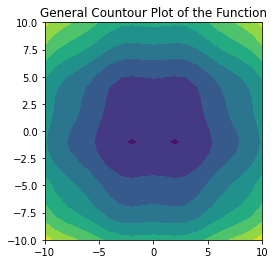

In [5]:
# Example
# Contour Plot of the function f(x,y) = cos(x) + sin(y) + (1/5)*x^2 + (1/4)*y^2
# For the range x in [-10,10] and y in [-10,10]

f_example = lambda x : np.cos(x[0]) + np.sin(x[1]) + (1/5)*(x[0])**2 + (1/4)*(x[1])**2
x = np.arange(-10, 11)
y = np.arange(-10,11)
X,Y = np.meshgrid(x,y)

f = f_example((X,Y))

# Plotting the countour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f)
ax.set_title('General Countour Plot of the Function')
ax.set_aspect(1)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


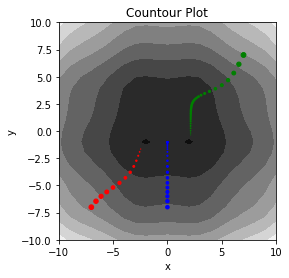

In [9]:
# Results for the example with different initial points
gamma, xtol, diff = 0.2, 10 ** (-4), 1

minima_1 = GDstep(f_example,(7,7),gamma,xtol,diff) # initial point at (7,7)
minima_2 = GDstep(f_example,(-7,-7),gamma,xtol,diff) # initial point at (-7,-7)
minima_3 = GDstep(f_example,(0,-7),gamma,xtol,diff) # initial point at (0,-7)

minima_1_x = [minima_1[0][i][0] for i in range(len(minima_1[0]))]
minima_1_y = [minima_1[0][j][1] for j in range(len(minima_1[0]))]
minima_1_val = [f_example(minima_1[0][k]) for k in range(len(minima_1[0]))] #values of the function

minima_2_x = [minima_2[0][i][0] for i in range(len(minima_2[0]))]
minima_2_y = [minima_2[0][j][1] for j in range(len(minima_2[0]))]
minima_2_val = [f_example(minima_2[0][k]) for k in range(len(minima_2[0]))] #values of the function

minima_3_x = [minima_3[0][i][0] for i in range(len(minima_3[0]))]
minima_3_y = [minima_3[0][j][1] for j in range(len(minima_3[0]))]
minima_3_val = [f_example(minima_3[0][k]) for k in range(len(minima_3[0]))] #values of the function

# Contour Plot of the function with the paths for each initial point
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f, cmap='gray')
ax.set_title('Countour Plot')
ax.set_aspect(1)
plt.scatter(minima_1_x,minima_1_y,minima_1_val,color="green")
plt.scatter(minima_2_x,minima_2_y,minima_2_val,color="red")
plt.scatter(minima_3_x,minima_3_y,minima_3_val,color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()